In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
import matplotlib.image as plt_image
from matplotlib.image import imread
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_sample_weight

In [2]:
# Tentukan konstanta
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
NUM_CLASSES = 20
Class = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']
train_dir = 'D:/DATA/Dataset/aksarajawa/train'
val_dir = 'D:/DATA/Dataset/aksarajawa/val'

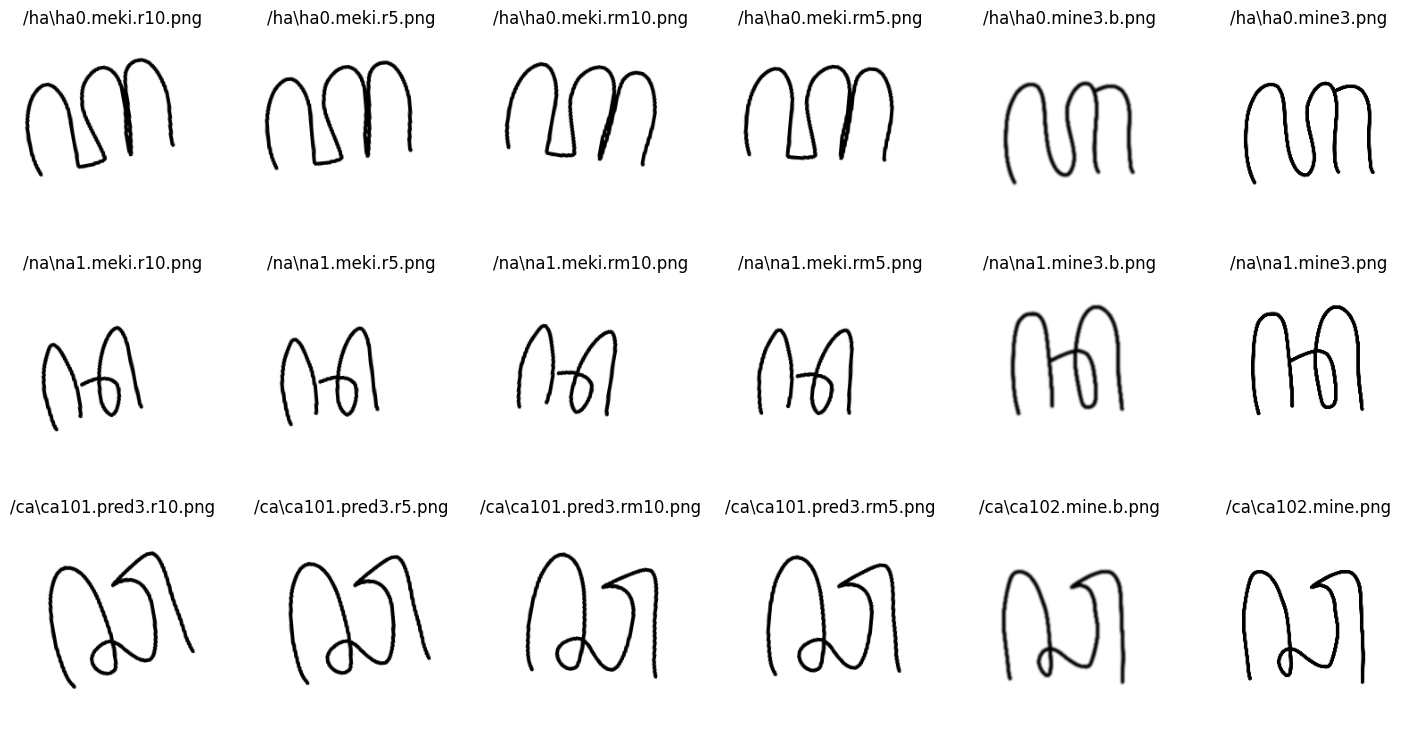

In [3]:
# Tentukan fungsi untuk menampilkan gambar
def show_random_images(directory, num_images=6):
    index = np.random.randint(20)  # Randomize the index
    plt.figure(figsize=(3*num_images, 9))

    # Buat daftar path gambar dari tiga kelas yang berbeda
    list_ha = [os.path.join('D:/DATA/Dataset/aksarajawa/train/ha', name) for name in os.listdir(os.path.join(directory, 'ha'))[index:index+num_images]]
    list_na = [os.path.join('D:/DATA/Dataset/aksarajawa/train/na', name) for name in os.listdir(os.path.join(directory, 'na'))[index:index+num_images]]
    list_ca = [os.path.join('D:/DATA/Dataset/aksarajawa/train/ca', name) for name in os.listdir(os.path.join(directory, 'ca'))[index:index+num_images]]

    # Tampilkan gambar
    for i, path in enumerate(list_ha+list_na+list_ca):
        plt.subplot(3, num_images, i+1)
        plt.axis('off')
        plt.title(path.replace(os.path.join('D:/DATA/Dataset/aksarajawa/train'), ''))
        img = plt_image.imread(path)
        plt.imshow(img)

# Panggil fungsi untuk menampilkan gambar setelah pelatihan model
show_random_images('D:/DATA/Dataset/aksarajawa/train', num_images=6)
plt.show()

In [4]:
# Buat generator data dengan augmentasi data untuk data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=Class
)

Found 2154 images belonging to 20 classes.


In [6]:
# Buat generator data tanpa augmentasi data untuk data validasi
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=Class
)

Found 480 images belonging to 20 classes.


In [7]:
# Mencari class weights untuk mengatasi ketidakseimbangan kelas
class_weights = compute_sample_weight('balanced', train_generator.classes)
class_weight = dict(enumerate(class_weights))

In [8]:
# Model CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [9]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#melatih Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/50
67/67 [==============================] - 97s 1s/step - loss: 9.5981 - accuracy: 0.0495 - val_loss: 7.2561 - val_accuracy: 0.0625
Epoch 2/50
67/67 [==============================] - 124s 2s/step - loss: 5.6698 - accuracy: 0.0961 - val_loss: 4.6154 - val_accuracy: 0.2000
Epoch 3/50
67/67 [==============================] - 95s 1s/step - loss: 3.7107 - accuracy: 0.2337 - val_loss: 3.3382 - val_accuracy: 0.3146
Epoch 4/50
67/67 [==============================] - 95s 1s/step - loss: 2.6583 - accuracy: 0.4006 - val_loss: 2.7436 - val_accuracy: 0.4542
Epoch 5/50
67/67 [==============================] - 97s 1s/step - loss: 2.0893 - accuracy: 0.5368 - val_loss: 2.3240 - val_accuracy: 0.4917
Epoch 6/50
67/67 [==============================] - 96s 1s/step - loss: 1.7604 - accuracy: 0.5980 - val_loss: 1.9993 - val_accuracy: 0.5625
Epoch 7/50
67/67 [==============================] - 95s 1s/step - loss: 1.4841 - accuracy: 0.6772 - val_loss: 1.8653 - val_accuracy: 0.6146
Epoch 8/50
67/67 [=

In [11]:
# Buat generator data untuk data uji
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),  
    batch_size=32,  
    class_mode='categorical'
)

Found 480 images belonging to 20 classes.


In [12]:
# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

15/15 [==============================] - 5s 333ms/step - loss: 1.0772 - accuracy: 0.8375
Test accuracy: 0.8374999761581421


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [14]:
# Menyimpan Model
model.save('D:/DATA/Dataset/aksarajawa/aksarajawa_cnn_model.h5')

C:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


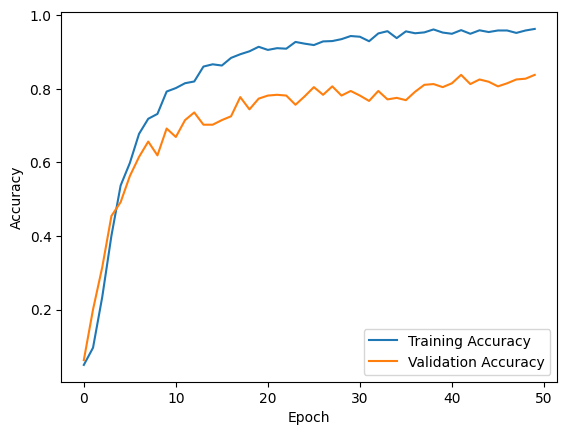

In [15]:
# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

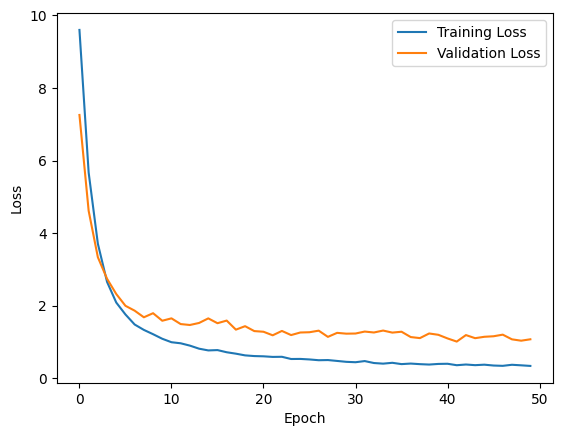

In [16]:
# Plot the training history for loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

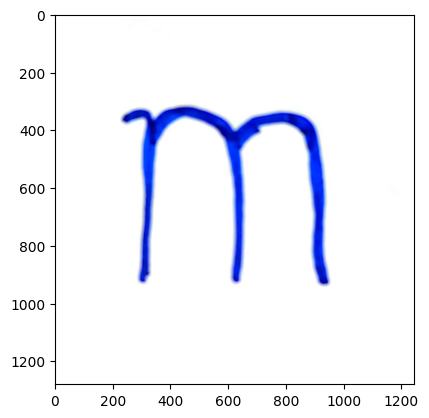

In [17]:
# Menguji Model
model = load_model('D:/DATA/Dataset/aksarajawa/aksarajawa_cnn_model.h5')
test_image_path = 'D:/DATA/Dataset/test/test.jpg'
img = image.load_img(test_image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0 

img = imread(test_image_path)
plt.imshow(img)

In [18]:
# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 363ms/step
Predicted class: ga


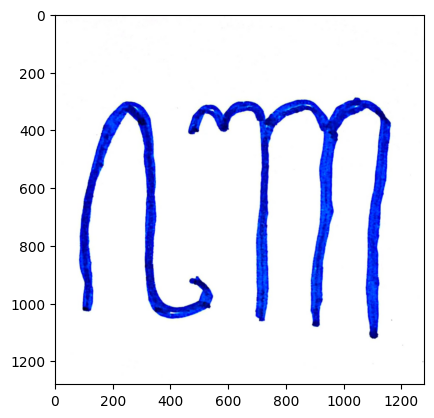

In [19]:
test_image_path2 = 'D:/DATA/Dataset/test/test2.jpg'
img = image.load_img(test_image_path2, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0 
img2 = imread(test_image_path2)
plt.imshow(img2)

In [20]:
# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 72ms/step
Predicted class: nya
